In [9]:
import shutil
try:
    shutil.rmtree("data/train")
    shutil.rmtree("data/test")
except:
    pass

In [10]:
import os
# ensure directories exist
from pathlib import Path

Path("data/train/damage").mkdir(parents=True, exist_ok=True)
Path("data/train/no_damage").mkdir(parents=True, exist_ok=True)

Path("data/test/damage").mkdir(parents=True, exist_ok=True)
Path("data/test/no_damage").mkdir(parents=True, exist_ok=True)

In [11]:
all_damage_file_paths = os.listdir('data/damage/damage')
all_no_damage_file_paths = os.listdir('data/no_damage/no_damage')


In [12]:
import random

train_damage_paths = random.sample(all_damage_file_paths, int(len(all_damage_file_paths)*0.8))
print("train damage image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in all_damage_file_paths if p not in train_damage_paths]
print("test bread image count: ", len(test_damage_paths))
# ensure no overlap:
overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("len of overlap: ", len(overlap))

train_no_damage_paths = random.sample(all_no_damage_file_paths, int(len(all_no_damage_file_paths)*0.8))
print("train damage image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in all_no_damage_file_paths if p not in train_no_damage_paths]
print("test bread image count: ", len(test_no_damage_paths))
# ensure no overlap:
overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("len of overlap: ", len(overlap))



train damage image count:  800
test bread image count:  200
len of overlap:  0
train damage image count:  800
test bread image count:  200
len of overlap:  0


In [13]:
# ensure to copy the images to the directories
import shutil
for p in train_damage_paths:
    shutil.copyfile(os.path.join('data/damage/damage', p), os.path.join('data/train/damage', p) )

for p in test_damage_paths:
    shutil.copyfile(os.path.join('data/damage/damage', p), os.path.join('data/test/damage', p) )

for p in train_no_damage_paths:
    shutil.copyfile(os.path.join('data/no_damage/no_damage', p), os.path.join('data/train/no_damage', p) )

for p in test_no_damage_paths:
    shutil.copyfile(os.path.join('data/no_damage/no_damage', p), os.path.join('data/test/no_damage', p) )


# check counts:
print("Files in train/damage: ", len(os.listdir('data/train/damage')))
print("Files in train/no_damage: ", len(os.listdir("data/train/no_damage")))

print("Files in test/damage: ", len(os.listdir("data/test/damage")))
print("Files in test/no_damage: ", len(os.listdir("data/test/no_damage")))


Files in train/damage:  800
Files in train/no_damage:  800
Files in test/damage:  200
Files in test/no_damage:  200


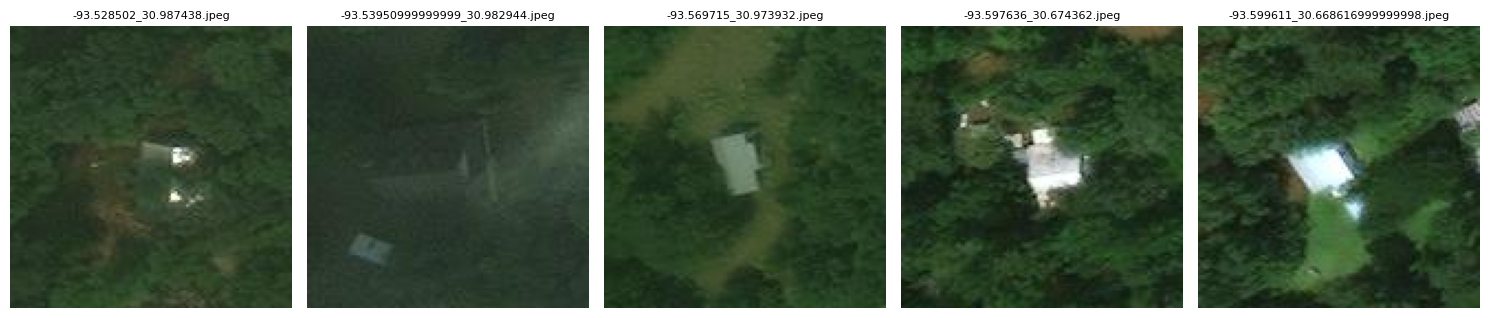

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image folder
folder_path = 'data/test/damage'

# Get all JPEG files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

# Sort (optional) and pick the first 5
image_files.sort()
first_5_paths = [os.path.join(folder_path, fname) for fname in image_files[:5]]

# Plotting
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(first_5_paths):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path), fontsize=8)
plt.tight_layout()
plt.show()


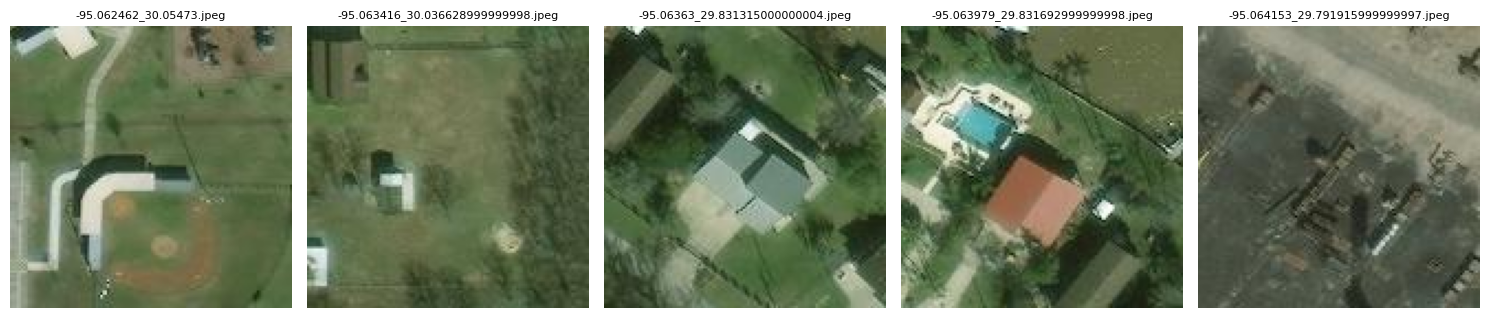

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to your image folder
folder_path = 'data/test/no_damage'

# Get all JPEG files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg'))]

# Sort (optional) and pick the first 5
image_files.sort()
first_5_paths = [os.path.join(folder_path, fname) for fname in image_files[:5]]

# Plotting
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(first_5_paths):
    img = mpimg.imread(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(img_path), fontsize=8)
plt.tight_layout()
plt.show()


In [16]:
# Looking at the images between damage and no damage, we see that they have different attributes.
# The images of damaged houses show much more overgrown trees and vegetation around the houses, with more grey/discolored roofs. The trees also tend to cover up the houses more.
# The images of non damaged houses have a lot less trees around, with more lighte colored fields around htehouses. They also show more colored roofs, either red or blue. 
# We also see lots more features of normal houses, like fields, playgrounds, and pools.

In [5]:
# import needed classes and functions
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Rescaling

# path to training data
train_data_dir = 'data/train'

# controls the size of the "batches" of images streamed when accessing the datasets.
# this is useful to control the memory usage with very large datasets
batch_size = 32

# target image size
img_height = 128
img_width = 128

# note that the subset parameter can take values of "training", "validation", or "both";
# the value dictates which dataset is returned (we want both)
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# rescale instance
rescale = Rescaling(scale=1.0/255)

# apply the rescale to the train and validation sets
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

Found 1600 files belonging to 2 classes.
Using 1280 files for training.
Using 320 files for validation.


In [6]:
# path to test data
test_data_dir = 'data/test/'

# we do not set subset=both here because we do not want the test set split
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    seed=123,
    image_size=(img_height, img_width),
)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 400 files belonging to 2 classes.


In [19]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Rescaling

model = Sequential([
    Flatten(),                                     # Flatten image to 1D vector
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')                 # Output layer for binary classification
])

In [3]:
from keras import optimizers
from tensorflow.keras.losses import BinaryCrossentropy


model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

NameError: name 'model' is not defined

In [21]:
# fit the model from image generator
history = model.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=20,
            validation_data=val_rescale_ds
)

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.5258 - loss: 1.0549 - val_accuracy: 0.7688 - val_loss: 0.5736
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.6503 - loss: 0.6373 - val_accuracy: 0.7937 - val_loss: 0.5014
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.7328 - loss: 0.5490 - val_accuracy: 0.7125 - val_loss: 0.5039
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.7473 - loss: 0.4995 - val_accuracy: 0.7344 - val_loss: 0.4735
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7490 - loss: 0.4877 - val_accuracy: 0.8094 - val_loss: 0.4351
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.7782 - loss: 0.4540 - val_accuracy: 0.7625 - val_loss: 0.4530
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7695 - loss: 0.4533 - val_accuracy: 0.7875 - val_loss: 0.4169
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.7920 - loss: 0.4183 - val_accuracy: 0.8062 - v

In [2]:
test_loss, test_accuracy = model.evaluate(test_rescale_ds, verbose=0)
test_accuracy

NameError: name 'model' is not defined

In [23]:
from keras import layers
from keras import models
import pandas as pd

model_lenet5 = models.Sequential()

# Layer 1: Convolutional layer with 6 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model_lenet5.add(layers.Flatten())

# Layer 3: Fully connected layer with 120 neurons
model_lenet5.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
model_lenet5.add(layers.Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 3 )
model_lenet5.add(layers.Dense(1, activation='sigmoid'))

# Compile model
model_lenet5.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss=BinaryCrossentropy(), metrics=['accuracy'])

# Generating the summary of the model
model_lenet5.summary()

In [24]:
history = model_lenet5.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=40,
            validation_data=val_rescale_ds
)

In [1]:
test_loss, test_accuracy = model_lenet5.evaluate(test_rescale_ds, verbose=0)
test_accuracy

NameError: name 'model_lenet5' is not defined

In [3]:
from keras import models, layers, optimizers
from tensorflow.keras.losses import BinaryCrossentropy

model_lenet_alternate = models.Sequential()

# Input: 150x150x3
model_lenet_alternate.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 74x74x32

model_lenet_alternate.add(layers.Conv2D(64, (3, 3), activation='relu'))  # -> 72x72x64
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 36x36x64

model_lenet_alternate.add(layers.Conv2D(128, (3, 3), activation='relu'))  # -> 34x34x128
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 17x17x128

model_lenet_alternate.add(layers.Conv2D(128, (3, 3), activation='relu'))  # -> 15x15x128
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 7x7x128

model_lenet_alternate.add(layers.Flatten())            # -> 6272
model_lenet_alternate.add(layers.Dropout(0.5))         # helps reduce overfitting
model_lenet_alternate.add(layers.Dense(512, activation='relu'))
model_lenet_alternate.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

model_lenet_alternate.compile(
    loss=BinaryCrossentropy(),
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

model_lenet_alternate.summary()

c:\Users\Abel\Desktop\coe\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,153 (9.92 MB)

 Trainable params: 2,601,153 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model_lenet_alternate.fit(
            train_rescale_ds,
            batch_size=32,
            epochs=35,
            validation_data=val_rescale_ds
)

Epoch 1/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.5803 - loss: 0.6603 - val_accuracy: 0.7125 - val_loss: 0.5466
Epoch 2/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - accuracy: 0.7114 - loss: 0.5313 - val_accuracy: 0.7563 - val_loss: 0.4756
Epoch 3/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.7687 - loss: 0.4633 - val_accuracy: 0.7437 - val_loss: 0.4874
Epoch 4/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.7976 - loss: 0.4408 - val_accuracy: 0.7500 - val_loss: 0.4933
Epoch 5/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.7845 - loss: 0.4451 - val_accuracy: 0.8250 - val_loss: 0.3808
Epoch 6/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - accuracy: 0.8266 - loss: 0.3829 - val_accuracy: 0.8094 - val_loss: 0.4057
Epoch 7/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.8393 - loss: 0.3570 - val_accuracy: 0.8687 - val_loss: 0.3313
Epoch 8/35
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.8660 - loss: 0.3156 - val_accuracy: 0.

In [5]:
test_loss, test_accuracy = model_lenet_alternate.evaluate(test_rescale_ds, verbose=0)
test_accuracy

0.9474999904632568

In [33]:
model_lenet_alternate.save("model.h5")


In [11]:
from keras import models, layers, optimizers
from tensorflow.keras.losses import BinaryCrossentropy

model_lenet_alternate = models.Sequential()

# Input: 128x128x3
model_lenet_alternate.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 64x64x32

model_lenet_alternate.add(layers.Conv2D(64, (3, 3), activation='relu'))  # -> 62x62x64
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 31x31x64

model_lenet_alternate.add(layers.Conv2D(128, (3, 3), activation='relu'))  # -> 29x29x128
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 14x14x128

model_lenet_alternate.add(layers.Conv2D(128, (3, 3), activation='relu'))  # -> 12x12x128
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 6x6x128

# ✅ New conv block
model_lenet_alternate.add(layers.Conv2D(256, (3, 3), activation='relu'))  # -> 4x4x256
model_lenet_alternate.add(layers.MaxPooling2D((2, 2)))  # -> 2x2x256
model_lenet_alternate.add(layers.Dropout(0.25))  # new early dropout

# Flatten and Dense
model_lenet_alternate.add(layers.Flatten())            # -> 1024
model_lenet_alternate.add(layers.Dropout(0.5))         # original dropout
model_lenet_alternate.add(layers.Dense(256, activation='relu'))  # reduced size
model_lenet_alternate.add(layers.Dense(1, activation='sigmoid'))

model_lenet_alternate.compile(
    loss=BinaryCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=1e-4),  # switched to Adam
    metrics=['accuracy']
)

model_lenet_alternate.summary()


c:\Users\Abel\Desktop\coe\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 798,657 (3.05 MB)

 Trainable params: 798,657 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_lenet_alternate.fit(train_rescale_ds, batch_size=32,
                          epochs=50,
                          validation_data=val_rescale_ds,
                          callbacks=[early_stop])


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - accuracy: 0.5664 - loss: 0.6813 - val_accuracy: 0.7375 - val_loss: 0.6057
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.7346 - loss: 0.5668 - val_accuracy: 0.7781 - val_loss: 0.4796
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.7229 - loss: 0.5138 - val_accuracy: 0.7906 - val_loss: 0.4465
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.7897 - loss: 0.4433 - val_accuracy: 0.7844 - val_loss: 0.4544
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.8053 - loss: 0.4140 - val_accuracy: 0.8469 - val_loss: 0.3509
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.8496 - loss: 0.3391 - val_accuracy: 0.7719 - val_loss: 0.4528
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.8601 - loss: 0.3129 - val_accuracy: 0.8875 - val_loss: 0.3019
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.8730 - loss: 0.2848 - val_accuracy: 0.

In [13]:
test_loss, test_accuracy = model_lenet_alternate.evaluate(test_rescale_ds, verbose=0)
test_accuracy

0.9700000286102295

In [14]:
model_lenet_alternate.save("model_best.h5")
